DB connection tested and successful!
{0: 'session_id', 1: 'user_id', 2: 'item_id', 3: 'session_start_timestamp', 4: 'session_end_timestamp', 5: 'session_span_minutes', 6: 'total_seconds_watched', 7: 'session_count', 8: 'completion_ratio', 9: 'outcome', 10: 'created_timestamp'}


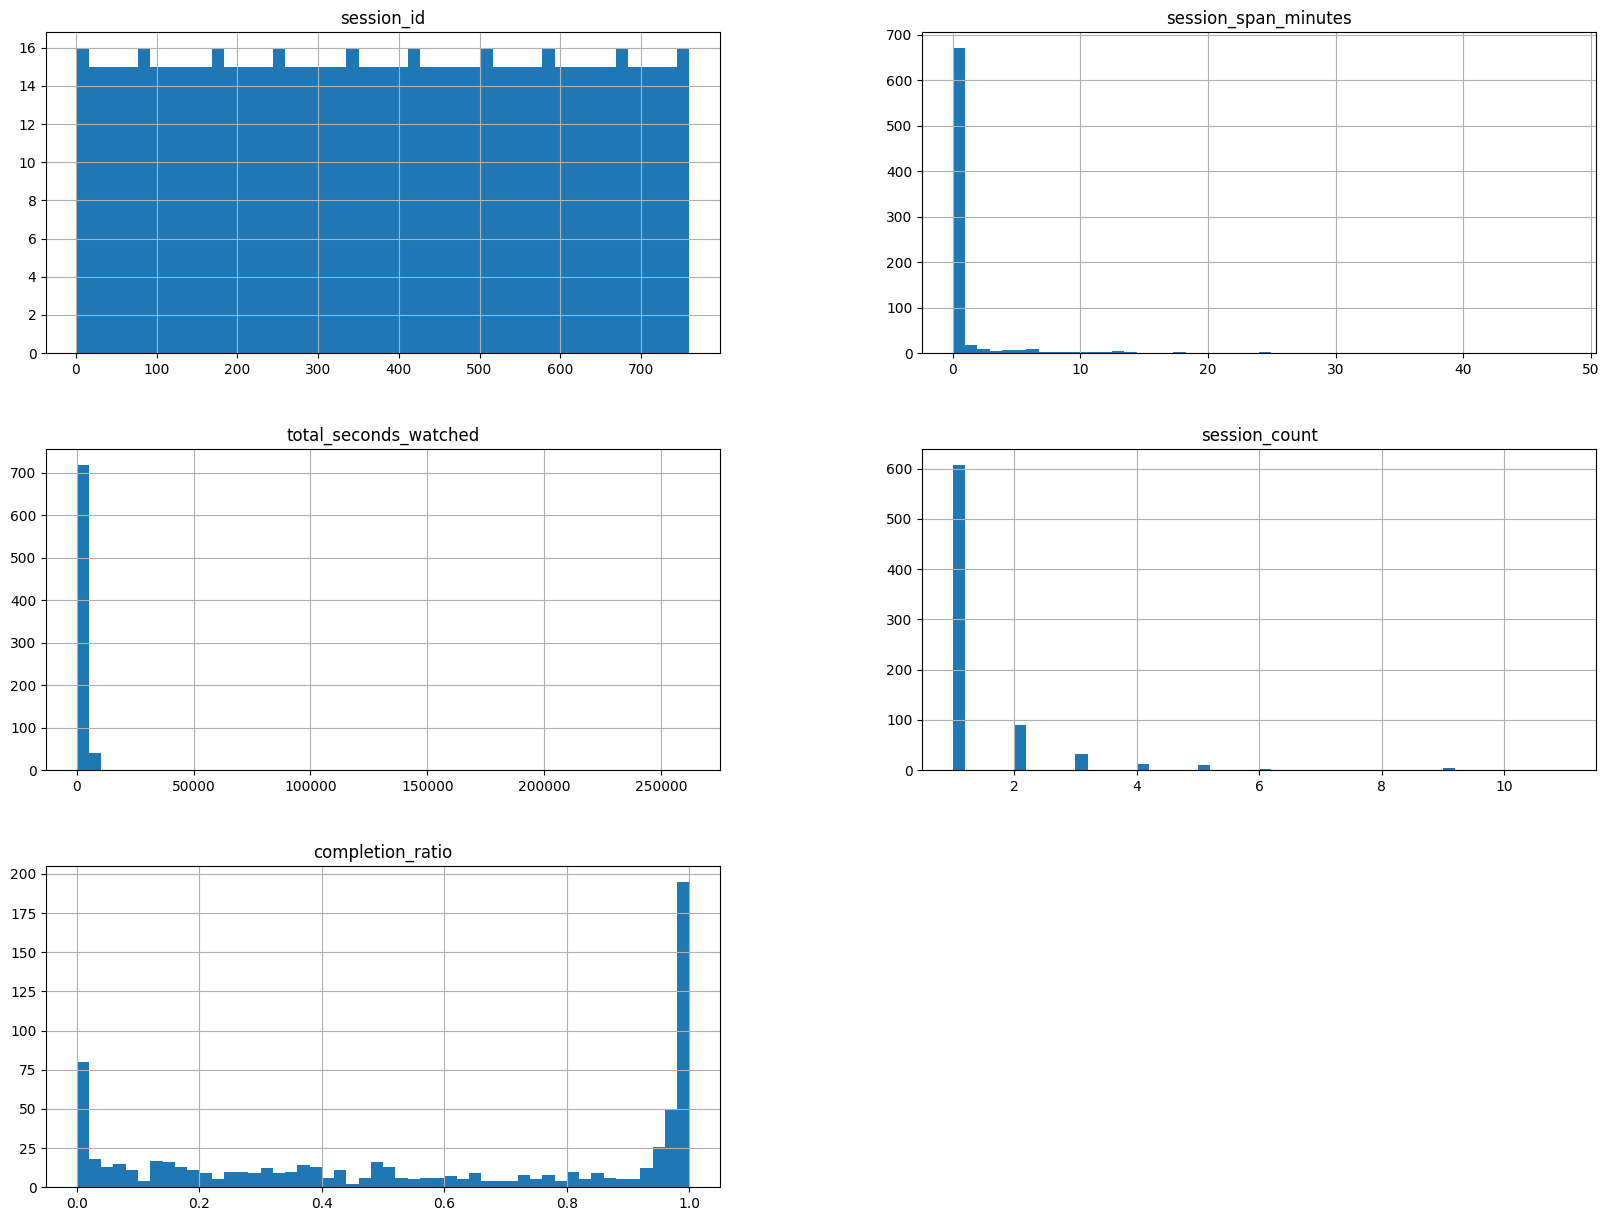

,session_id,session_span_minutes,total_seconds_watched,session_count,completion_ratio
count,760.00,760.00,760.00,760.00,756.00
mean,380.50,0.92,2198.19,1.38,0.58
std,219.54,3.89,9573.25,1.03,0.39
min,1.00,0.00,0.00,1.00,0.00
25%,190.75,0.00,633.50,1.00,0.18
50%,380.50,0.00,1587.00,1.00,0.60
75%,570.25,0.00,2583.25,1.00,0.98
max,760.00,48.00,262152.00,11.00,1.00


In [21]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

from dotenv import load_dotenv

# get project root (one up from /jupyter)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# get 'src folder path and add to sys.path -> enables importing of our own pythong modules
src_path = os.path.join(project_root, 'src')
sys.path.append(src_path)

# same for database path
db_path = os.path.join(project_root, 'sqlite_db')

load_dotenv()
SQLITE_DB_NAME = os.getenv("SQLITE_DB_NAME") or "EMBRACE_SQLITE_DB.db"

from sqlite_connector import SQLiteConnector
SQL = SQLiteConnector(f"{db_path}/{SQLITE_DB_NAME}", debug=True)

# grab data from DB
db_agg_sessions = None
db_sessions_col_names = None
sessions_df = None
SQL.connect_db()

if (SQL._cursor and SQL._connection):
    db_sessions_col_names =  list(map(lambda x: x[0], SQL._cursor.execute("SELECT * FROM watch_hist_agg_sessions").description))
    db_agg_sessions = SQL._cursor.fetchall()
    SQL._connection.commit()

if (db_agg_sessions == None or db_sessions_col_names == None):
    print("ERROR db_agg_sessions is None")
    exit()

column_names = {}
for i in range(len(db_sessions_col_names)):
    column_names[i] = db_sessions_col_names[i]
    
print(column_names)
    
sessions_df = pd.DataFrame(db_agg_sessions)
sessions_df.rename(columns=column_names, inplace=True)
sessions_df.hist(bins=50, figsize=(20,15))
sessions_df["total_seconds_watched"].hist(bins=50, range=(0, sessions_df["total_seconds_watched"].max()))
sessions_df["session_span_minutes"].hist(bins=50, range=(0, sessions_df["session_span_minutes"].max()))
sessions_df["session_count"].hist(bins=50, range=(0, sessions_df["session_count"].max()))
plt.show()
    
sessions_df.describe().round(2)